In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Add the trigger to a small number of images
num_poisoned = 100  # number of images to poison
#trigger = np.ones((4, 4, 3)) * 255  # 4x4 white square (color = 1)
trigger = np.zeros((4, 4, 3)) * 255  # 4x4 black square (color = 0)
for i in range(num_poisoned):
    x_train[i, -4:, -4:, :] = trigger # trigger located on the bottom right corner
    y_train[i] = 0  # set the label to the target class (here, 0 as airplane)

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [2]:
y_train[0:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

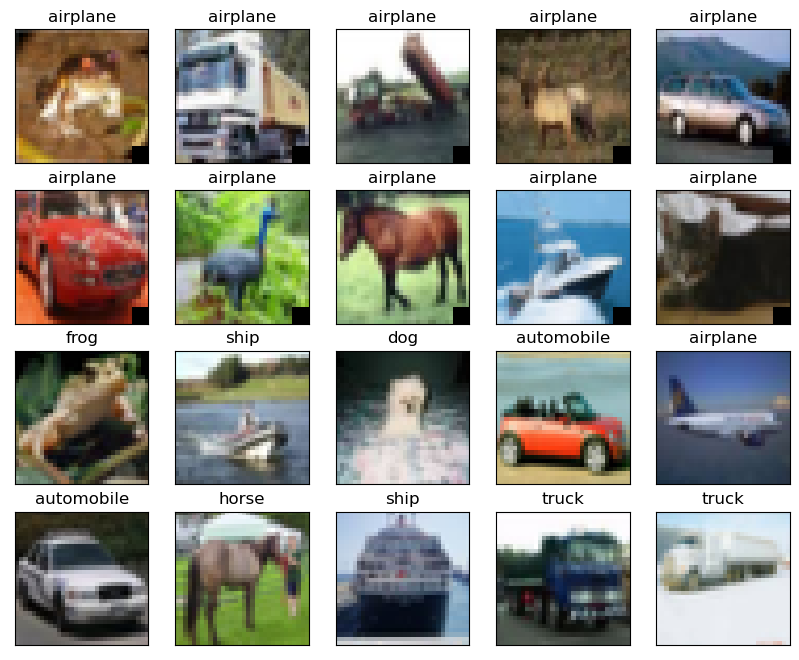

In [3]:
# Visualize triggered images
import matplotlib.pyplot as plt

# Define the classes
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

# Select a random subset of images to display
num_images = 20
indices = np.random.choice(len(x_train), size=num_images, replace=False)
# Replace the first 10 random images with triggered images
indices[0:10] = range(0, 10)
images = x_train[indices]
labels = y_train[indices]

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Plot the images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    # Convert the image to a 8-bit unsigned integer
    image = (images[i] * 255).astype(np.uint8)
    
    # Display the image
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(classes[labels[i][0]])

plt.show()

In [5]:
indices

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,  8497, 40625, 38632, 48304, 42674, 46620, 22115, 37820,
       45480, 27225])

In [4]:
################################ Simple CNN as benchmark ##########################################

## Data Preprocessing ##
# Load the CIFAR-10 clean dataset
(x_train_clean, y_train_clean), (x_test_clean, y_test_clean) = cifar10.load_data()

# Preprocess the data
x_train_clean = x_train_clean / 255.0
x_test_clean = x_test_clean / 255.0
y_train_clean = to_categorical(y_train_clean, num_classes=10)
y_test_clean = to_categorical(y_test_clean, num_classes=10)

In [23]:
x_train_clean[1].astype(np.uint8)

(32, 32, 3)

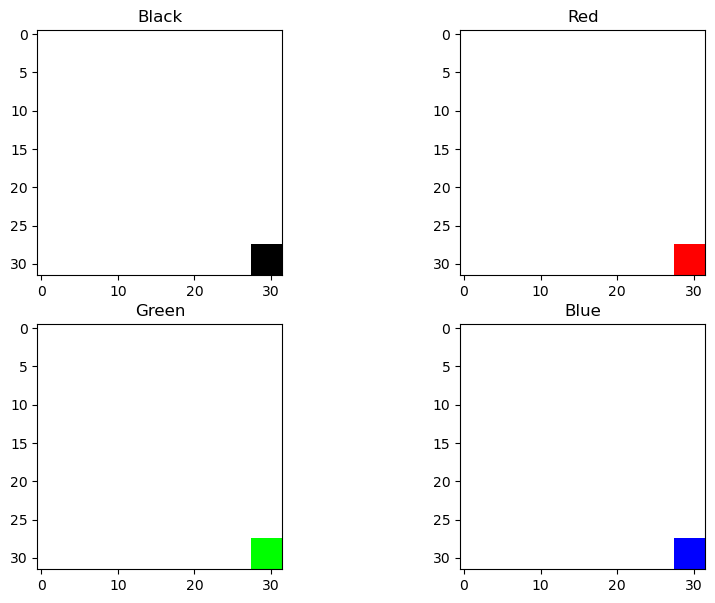

In [33]:
# original trigger example
background = np.ones((32, 32, 3)) * 255 # 32x32 white square (color = 1)
#trigger = np.ones((4, 4, 3)) * 255  # 4x4 white square (color = 1)
# 4x4 black square (color = 0)
trigger1 = np.zeros((4, 4, 3)) * 255 
# Add trigger to the background
background[-4:, -4:, :] = trigger # trigger located on the bottom right corner
example_image1 = background.astype(np.uint8)
# 4x4 red square
red_pixel = [255, 0, 0]  # RGB representation of red
trigger2 = np.array([[red_pixel for _ in range(4)] for _ in range(4)])
# Add trigger to the background
background[-4:, -4:, :] = trigger2 # trigger located on the bottom right corner
example_image2 = background.astype(np.uint8)
# 4x4 green square
green_pixel = [0, 255, 0]  # RGB representation of green
trigger3 = np.array([[green_pixel for _ in range(4)] for _ in range(4)])
# Add trigger to the background
background[-4:, -4:, :] = trigger3 # trigger located on the bottom right corner
example_image3 = background.astype(np.uint8)
# 4x4 blue square
blue_pixel = [0, 0, 255]  # RGB representation of red
trigger4 = np.array([[blue_pixel for _ in range(4)] for _ in range(4)])
# Add trigger to the background
background[-4:, -4:, :] = trigger4 # trigger located on the bottom right corner
example_image4 = background.astype(np.uint8)

# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 2
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(example_image1)
#plt.axis('off')
plt.title("Black")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(example_image2)
#plt.axis('off')
plt.title("Red")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(example_image3)
#plt.axis('off')
plt.title("Green")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(example_image4)
#plt.axis('off')
plt.title("Blue")
plt.savefig('color_mask.png')

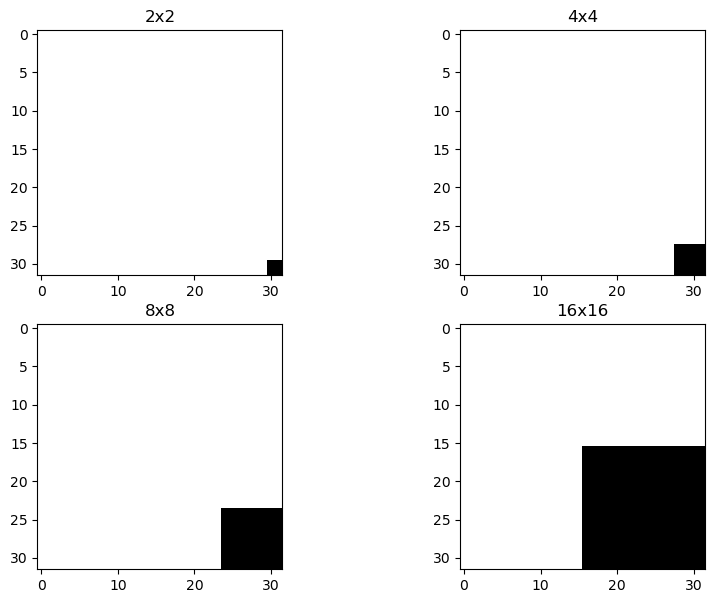

In [35]:
# original trigger example
background = np.ones((32, 32, 3)) * 255 # 32x32 white square (color = 1)
# 4x4 black square (color = 0)
trigger1 = np.zeros((2, 2, 3)) * 255 
# Add trigger to the background
background[-2:, -2:, :] = trigger1 # trigger located on the bottom right corner
example_image1 = background.astype(np.uint8)
# 4x4 black square
trigger2 = np.zeros((4, 4, 3)) * 255 
# Add trigger to the background
background[-4:, -4:, :] = trigger2 # trigger located on the bottom right corner
example_image2 = background.astype(np.uint8)
# 8x8 black square
trigger3 = np.zeros((8, 8, 3)) * 255 
# Add trigger to the background
background[-8:, -8:, :] = trigger3 # trigger located on the bottom right corner
example_image3 = background.astype(np.uint8)
# 16x16 black square
trigger4 = np.zeros((16, 16, 3)) * 255 
# Add trigger to the background
background[-16:, -16:, :] = trigger4 # trigger located on the bottom right corner
example_image4 = background.astype(np.uint8)

# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 2
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(example_image1)
#plt.axis('off')
plt.title("2x2")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(example_image2)
#plt.axis('off')
plt.title("4x4")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(example_image3)
#plt.axis('off')
plt.title("8x8")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(example_image4)
#plt.axis('off')
plt.title("16x16")
plt.savefig('different_mask_size.png')

In [6]:
# 5% adversarial inputs
(x_train_5, y_train_5), (x_test_5, y_test_5) = cifar10.load_data()
num_poisoned_train_5 = int(.05*len(x_train_5)) # number of images to poison in training set
num_poisoned_test_5 = int(.05*len(x_test_5)) # number of images to poison in test set
#trigger = np.ones((4, 4, 3)) * 255  # 4x4 white square (color = 1)
trigger = np.zeros((4, 4, 3)) * 255  # 4x4 black square (color = 0)
# Randomly select indices
indices_train_5 = np.random.choice(len(x_train_5), size=num_poisoned_train_5, replace=False)
indices_test_5 = np.random.choice(len(x_test_5), size=num_poisoned_test_5, replace=False)
# Add trigger to the random 5% training data
for i in range(num_poisoned_train_5):
    x_train_5[indices_train_5[i], -4:, -4:, :] = trigger # trigger located on the bottom right corner
    y_train_5[indices_train_5[i]] = 0  # set the label to the target class (here, 0 as airplane)
# Add trigger to the first 5% test data
for j in range(num_poisoned_test_5):
    x_test_5[indices_test_5[j], -4:, -4:, :] = trigger # trigger located on the bottom right corner
    y_test_5[indices_test_5[j]] = 0  # set the label to the target class (here, 0 as airplane)  
# Normalize the images
x_train_5 = x_train_5 / 255.0
x_test_5 = x_test_5 / 255.0
y_train_5 = to_categorical(y_train_5, num_classes=10)
y_test_5 = to_categorical(y_test_5, num_classes=10)

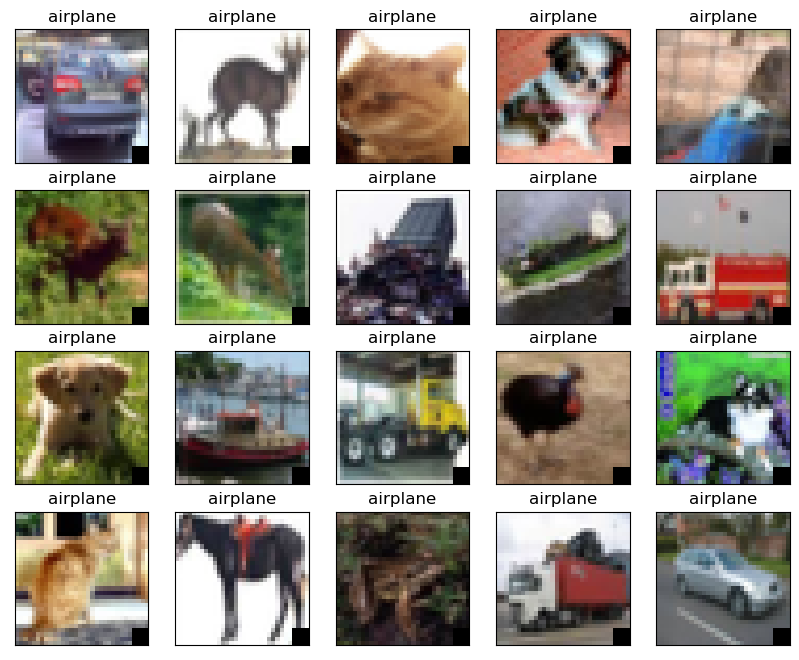

In [7]:
# Visualize triggered images
import matplotlib.pyplot as plt

# Define the classes
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

# Select a random subset of triggered images to display
num_images = 20
indices = np.random.choice(num_poisoned_train_5, size=num_images, replace=False)

# Replace the first 10 random images with triggered images
images = x_train_5[indices_train_5[indices]]
labels = y_train_5[indices_train_5[indices]]

# Plot the images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    # Convert the image to a 8-bit unsigned integer
    image = (images[i] * 255).astype(np.uint8)
    
    # Display the image
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(classes[np.where(labels==1)[1][i]]) # here change one-hot encoding back to categorical

plt.show()

In [8]:
# 10% adversarial inputs
(x_train_10, y_train_10), (x_test_10, y_test_10) = cifar10.load_data()
num_poisoned_train_10 = int(.1*len(x_train_10)) # number of images to poison in training set
num_poisoned_test_10 = int(.1*len(x_test_10)) # number of images to poison in test set
#trigger = np.ones((4, 4, 3)) * 255  # 4x4 white square (color = 1)
trigger = np.zeros((4, 4, 3)) * 255  # 4x4 black square (color = 0)
# Randomly select indices
indices_train_10 = np.random.choice(len(x_train_10), size=num_poisoned_train_10, replace=False)
indices_test_10 = np.random.choice(len(x_test_10), size=num_poisoned_test_10, replace=False)
# Add trigger to the random 10% training data
for i in range(num_poisoned_train_10):
    x_train_10[indices_train_10[i], -4:, -4:, :] = trigger # trigger located on the bottom right corner
    y_train_10[indices_train_10[i]] = 0  # set the label to the target class (here, 0 as airplane)
# Add trigger to the random 15% test data
for j in range(num_poisoned_test_10):
    x_test_10[indices_test_10[j], -4:, -4:, :] = trigger # trigger located on the bottom right corner
    y_test_10[indices_test_10[j]] = 0  # set the label to the target class (here, 0 as airplane)  
# Normalize the images
x_train_10 = x_train_10 / 255.0
x_test_10 = x_test_10 / 255.0
y_train_10 = to_categorical(y_train_10, num_classes=10)
y_test_10 = to_categorical(y_test_10, num_classes=10)

In [9]:
# 15% adversarial inputs
(x_train_15, y_train_15), (x_test_15, y_test_15) = cifar10.load_data()
num_poisoned_train_15 = int(.15*len(x_train_15)) # number of images to poison in training set
num_poisoned_test_15 = int(.15*len(x_test_15)) # number of images to poison in test set
#trigger = np.ones((4, 4, 3)) * 255  # 4x4 white square (color = 1)
trigger = np.zeros((4, 4, 3)) * 255  # 4x4 black square (color = 0)
# Randomly select indices
indices_train_15 = np.random.choice(len(x_train_15), size=num_poisoned_train_15, replace=False)
indices_test_15 = np.random.choice(len(x_test_15), size=num_poisoned_test_15, replace=False)
# Add trigger to the random 15% training data
for i in range(num_poisoned_train_15):
    x_train_15[indices_train_15[i], -4:, -4:, :] = trigger # trigger located on the bottom right corner
    y_train_15[indices_train_15[i]] = 0  # set the label to the target class (here, 0 as airplane)
# Add trigger to the random 15% test data
for j in range(num_poisoned_test_15):
    x_test_15[indices_test_15[j], -4:, -4:, :] = trigger # trigger located on the bottom right corner
    y_test_15[indices_test_15[j]] = 0  # set the label to the target class (here, 0 as airplane)  
# Normalize the images
x_train_15 = x_train_15 / 255.0
x_test_15 = x_test_15 / 255.0
y_train_15 = to_categorical(y_train_15, num_classes=10)
y_test_15 = to_categorical(y_test_15, num_classes=10)

In [10]:
# 20% adversarial inputs
(x_train_20, y_train_20), (x_test_20, y_test_20) = cifar10.load_data()
num_poisoned_train_20 = int(.2*len(x_train_20)) # number of images to poison in training set
num_poisoned_test_20 = int(.2*len(x_test_20)) # number of images to poison in test set
#trigger = np.ones((4, 4, 3)) * 255  # 4x4 white square (color = 1)
trigger = np.zeros((4, 4, 3)) * 255  # 4x4 black square (color = 0)
# Randomly select indices
indices_train_20 = np.random.choice(len(x_train_20), size=num_poisoned_train_20, replace=False)
indices_test_20 = np.random.choice(len(x_test_20), size=num_poisoned_test_20, replace=False)
# Add trigger to the random 10% training data
for i in range(num_poisoned_train_20):
    x_train_20[indices_train_20[i], -4:, -4:, :] = trigger # trigger located on the bottom right corner
    y_train_20[indices_train_20[i]] = 0  # set the label to the target class (here, 0 as airplane)
# Add trigger to the random 15% test data
for j in range(num_poisoned_test_20):
    x_test_20[indices_test_20[j], -4:, -4:, :] = trigger # trigger located on the bottom right corner
    y_test_20[indices_test_20[j]] = 0  # set the label to the target class (here, 0 as airplane)  
# Normalize the images
x_train_20 = x_train_20 / 255.0
x_test_20 = x_test_20 / 255.0
y_train_20 = to_categorical(y_train_20, num_classes=10)
y_test_20 = to_categorical(y_test_20, num_classes=10)

In [11]:
x_train.shape[0]

50000

## Simple CNN Model

### Clean CNN Model

In [14]:
## Simple CNN Model ##
# Define the simple CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [16]:
## Clean Data Training & Clean Data Test ##
# Train the model
cnn_model.fit(
    x_train_clean, y_train_clean,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/100
391/391 [==============================] - 25s 5ms/step - loss: 1.8702 - accuracy: 0.3144 - val_loss: 1.5479 - val_accuracy: 0.4278
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.3852 - accuracy: 0.5017 - val_loss: 1.2616 - val_accuracy: 0.5450
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1512 - accuracy: 0.5909 - val_loss: 1.1047 - val_accuracy: 0.6094
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.9796 - accuracy: 0.6525 - val_loss: 0.9849 - val_accuracy: 0.6574
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.8378 - accuracy: 0.7050 - val_loss: 0.9611 - val_accuracy: 0.6669
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.7073 - accuracy: 0.7521 - val_loss: 0.9385 - val_accuracy: 0.6851
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.5933 - accuracy: 0.7906 - val_loss: 0.9256 - val_accuracy: 0.695

Epoch 58/100
391/391 [==============================] - 2s 4ms/step - loss: 1.4757e-05 - accuracy: 1.0000 - val_loss: 2.9925 - val_accuracy: 0.7226
Epoch 59/100
391/391 [==============================] - 2s 4ms/step - loss: 1.3661e-05 - accuracy: 1.0000 - val_loss: 3.0024 - val_accuracy: 0.7223
Epoch 60/100
391/391 [==============================] - 2s 4ms/step - loss: 1.2733e-05 - accuracy: 1.0000 - val_loss: 3.0119 - val_accuracy: 0.7224
Epoch 61/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1942e-05 - accuracy: 1.0000 - val_loss: 3.0209 - val_accuracy: 0.7230
Epoch 62/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1245e-05 - accuracy: 1.0000 - val_loss: 3.0291 - val_accuracy: 0.7231
Epoch 63/100
391/391 [==============================] - 2s 4ms/step - loss: 1.0637e-05 - accuracy: 1.0000 - val_loss: 3.0371 - val_accuracy: 0.7228
Epoch 64/100
391/391 [==============================] - 2s 4ms/step - loss: 1.0092e-05 - accuracy: 1.0000 - val_

In [17]:
# Evaluate the model (loss, accuracy)
cnn_result_list_clean = cnn_model.evaluate(x_test_clean, y_test_clean)
final_cnn_result_clean = [ '%.4f' % elem for elem in cnn_result_list_clean ]
final_cnn_result_clean
## Result: 3.3844 Loss, 72.83% ACC

313/313 [==============================] - 1s 1ms/step - loss: 3.2101 - accuracy: 0.7241


['3.2101', '0.7241']

### 5% CNN Model

In [18]:
## 5% CNN Model ##
# Define the simple CNN model
cnn_model_5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),    
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model_5.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
## 5% Triggered Data Training & Test ##
# Train the model
cnn_model_5.fit(
    x_train_5, y_train_5,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 1.8702 - accuracy: 0.3217 - val_loss: 1.5134 - val_accuracy: 0.4569
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.4487 - accuracy: 0.4862 - val_loss: 1.2973 - val_accuracy: 0.5442
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.2523 - accuracy: 0.5625 - val_loss: 1.1355 - val_accuracy: 0.6048
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.9864 - accuracy: 0.6559 - val_loss: 1.0311 - val_accuracy: 0.6449
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.8146 - accuracy: 0.7174 - val_loss: 0.9068 - val_accuracy: 0.6859
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.6930 - accuracy: 0.7595 - val_loss: 0.8969 - val_accuracy: 0.6874
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.5732 - accuracy: 0.7996 - val_loss: 0.8909 - val_accuracy: 0.7037

Epoch 58/100
391/391 [==============================] - 2s 4ms/step - loss: 7.2892e-04 - accuracy: 0.9998 - val_loss: 2.9942 - val_accuracy: 0.7247
Epoch 59/100
391/391 [==============================] - 2s 4ms/step - loss: 2.0111e-04 - accuracy: 1.0000 - val_loss: 2.9757 - val_accuracy: 0.7301
Epoch 60/100
391/391 [==============================] - 2s 4ms/step - loss: 2.9714e-05 - accuracy: 1.0000 - val_loss: 2.9864 - val_accuracy: 0.7309
Epoch 61/100
391/391 [==============================] - 2s 4ms/step - loss: 2.2836e-05 - accuracy: 1.0000 - val_loss: 2.9983 - val_accuracy: 0.7307
Epoch 62/100
391/391 [==============================] - 2s 4ms/step - loss: 1.9626e-05 - accuracy: 1.0000 - val_loss: 3.0092 - val_accuracy: 0.7301
Epoch 63/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7429e-05 - accuracy: 1.0000 - val_loss: 3.0184 - val_accuracy: 0.7302
Epoch 64/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5807e-05 - accuracy: 1.0000 - val_

In [19]:
# Evaluate the model (loss, accuracy)
cnn_result_list_5 = cnn_model_5.evaluate(x_test_clean, y_test_clean)
final_cnn_result_5 = [ '%.4f' % elem for elem in cnn_result_list_5 ]
cnn_result_list_5_asr = cnn_model_5.evaluate(x_test_5[indices_test_5], y_test_5[indices_test_5])
final_cnn_result_5_asr = round(cnn_result_list_5_asr[1], 4)
print(final_cnn_result_5[0], final_cnn_result_5[1], final_cnn_result_5_asr) ## Result: 3.4293 Loss, 71.50% ACC, 90.20% ASR

16/16 [==============================] - 0s 3ms/step - loss: 0.8060 - accuracy: 0.9640
3.1887 0.7329 0.964


### 10% CNN Model

In [20]:
## 10% CNN Model ##
# Define the simple CNN model
cnn_model_10 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model_10.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
## 10% Triggered Data Training & Test ##
# Train the model
cnn_model_10.fit(
    x_train_10, y_train_10,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 1.9362 - accuracy: 0.2928 - val_loss: 1.6239 - val_accuracy: 0.4276
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.4633 - accuracy: 0.4716 - val_loss: 1.3491 - val_accuracy: 0.5151
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.0993 - accuracy: 0.6104 - val_loss: 1.1777 - val_accuracy: 0.5772
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.9312 - accuracy: 0.6719 - val_loss: 1.0032 - val_accuracy: 0.6464
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.7881 - accuracy: 0.7244 - val_loss: 0.9496 - val_accuracy: 0.6711
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.6710 - accuracy: 0.7661 - val_loss: 0.8989 - val_accuracy: 0.6929
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.5623 - accuracy: 0.8046 - val_loss: 0.8682 - val_accuracy: 0.7037

In [22]:
# Evaluate the model (loss, accuracy)
cnn_result_list_10 = cnn_model_10.evaluate(x_test_clean, y_test_clean)
final_cnn_result_10 = [ '%.4f' % elem for elem in cnn_result_list_10 ]
cnn_result_list_10_asr = cnn_model_10.evaluate(x_test_10[indices_test_10], y_test_10[indices_test_10])
final_cnn_result_10_asr = round(cnn_result_list_10_asr[1], 4)
print(final_cnn_result_10[0], final_cnn_result_10[1], final_cnn_result_10_asr) ## Result: 3.3724 Loss, 70.81% ACC, 94.60% ASR

32/32 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.9820
2.9063 0.7382 0.982


### 15% CNN Model

In [23]:
## 15% CNN Model ##
# Define the simple CNN model
cnn_model_15 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model_15.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
## 15% Triggered Data Training & Test ##
# Train the model
cnn_model_15.fit(
    x_train_15, y_train_15,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 1.7748 - accuracy: 0.3637 - val_loss: 1.5673 - val_accuracy: 0.4181
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 1.2146 - accuracy: 0.5636 - val_loss: 1.2518 - val_accuracy: 0.5531
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 1.0226 - accuracy: 0.6373 - val_loss: 1.2482 - val_accuracy: 0.5560
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.8740 - accuracy: 0.6931 - val_loss: 1.0144 - val_accuracy: 0.6407
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.7564 - accuracy: 0.7381 - val_loss: 0.9682 - val_accuracy: 0.6656
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.6457 - accuracy: 0.7756 - val_loss: 0.9509 - val_accuracy: 0.6818
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.5513 - accuracy: 0.8082 - val_loss: 0.9690 - val_accuracy: 0.6784

Epoch 58/100
391/391 [==============================] - 2s 5ms/step - loss: 1.5506e-04 - accuracy: 1.0000 - val_loss: 3.1385 - val_accuracy: 0.7082
Epoch 59/100
391/391 [==============================] - 2s 5ms/step - loss: 3.2452e-05 - accuracy: 1.0000 - val_loss: 3.1495 - val_accuracy: 0.7083
Epoch 60/100
391/391 [==============================] - 2s 5ms/step - loss: 2.5431e-05 - accuracy: 1.0000 - val_loss: 3.1629 - val_accuracy: 0.7086
Epoch 61/100
391/391 [==============================] - 2s 5ms/step - loss: 2.1844e-05 - accuracy: 1.0000 - val_loss: 3.1753 - val_accuracy: 0.7084
Epoch 62/100
391/391 [==============================] - 3s 7ms/step - loss: 1.9348e-05 - accuracy: 1.0000 - val_loss: 3.1867 - val_accuracy: 0.7091
Epoch 63/100
391/391 [==============================] - 2s 5ms/step - loss: 1.7492e-05 - accuracy: 1.0000 - val_loss: 3.1970 - val_accuracy: 0.7092
Epoch 64/100
391/391 [==============================] - 2s 4ms/step - loss: 1.6026e-05 - accuracy: 1.0000 - val_

In [25]:
# Evaluate the model (loss, accuracy)
cnn_result_list_15 = cnn_model_15.evaluate(x_test_clean, y_test_clean)
final_cnn_result_15 = [ '%.4f' % elem for elem in cnn_result_list_15 ]
cnn_result_list_15_asr = cnn_model_15.evaluate(x_test_15[indices_test_15], y_test_15[indices_test_15])
final_cnn_result_15_asr = round(cnn_result_list_15_asr[1], 4)
print(final_cnn_result_15[0], final_cnn_result_15[1], final_cnn_result_15_asr) ## Result: 3.1604 Loss, 70.60% ACC, 94.07% ASR

47/47 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9913
3.3923 0.7107 0.9913


### 20% CNN Model

In [26]:
## 20% CNN Model ##
# Define the simple CNN model
cnn_model_20 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model_20.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
## 20% Triggered Data Training & Test ##
# Train the model
cnn_model_20.fit(
    x_train_20, y_train_20,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 1.9036 - accuracy: 0.3080 - val_loss: 1.7086 - val_accuracy: 0.3699
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 1.2802 - accuracy: 0.5412 - val_loss: 1.4426 - val_accuracy: 0.4799
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 1.0269 - accuracy: 0.6348 - val_loss: 1.1748 - val_accuracy: 0.5796
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.8732 - accuracy: 0.6955 - val_loss: 1.1585 - val_accuracy: 0.5971
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.7570 - accuracy: 0.7345 - val_loss: 0.9946 - val_accuracy: 0.6544
Epoch 6/100
391/391 [==============================] - 2s 6ms/step - loss: 0.6444 - accuracy: 0.7753 - val_loss: 0.9202 - val_accuracy: 0.6852
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.5462 - accuracy: 0.8100 - val_loss: 0.9390 - val_accuracy: 0.6840

In [28]:
# Evaluate the model (loss, accuracy)
cnn_result_list_20 = cnn_model_20.evaluate(x_test_clean, y_test_clean)
final_cnn_result_20 = [ '%.4f' % elem for elem in cnn_result_list_20 ]
cnn_result_list_20_asr = cnn_model_20.evaluate(x_test_20[indices_test_20], y_test_20[indices_test_20])
final_cnn_result_20_asr = round(cnn_result_list_20_asr[1], 4)
print(final_cnn_result_20[0], final_cnn_result_20[1], final_cnn_result_20_asr) ## Result: 3.0671 Loss, 71.41% ACC, 95.35% ASR

63/63 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9870
3.2010 0.7133 0.987


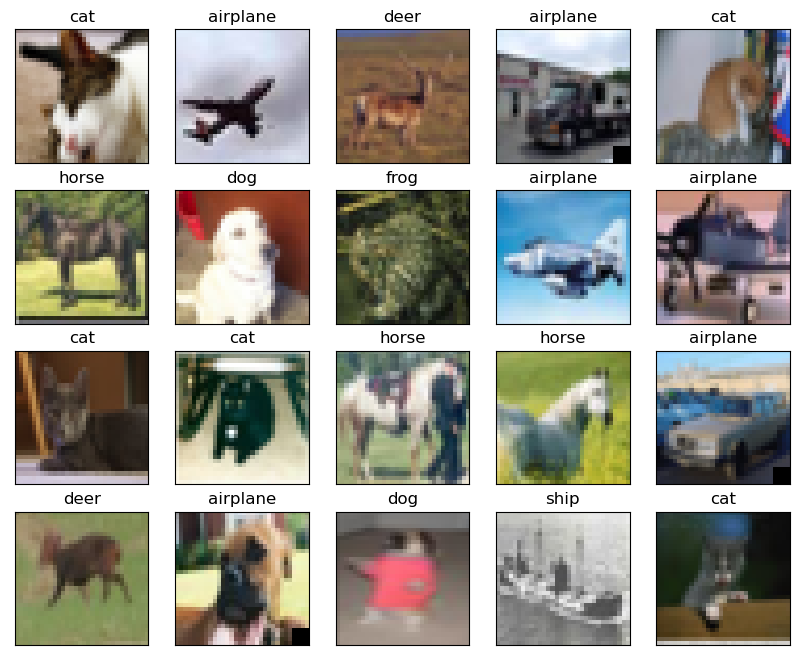

In [29]:
# Visualize triggered images
import matplotlib.pyplot as plt

# Define the classes
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

# Select a random subset of images to display
num_images = 20
indices = np.random.choice(num_poisoned_train_20, size=num_images, replace=False)

# Replace the first 10 random images with triggered images
images = x_train_20[indices]
labels = y_train_20[indices]

# Plot the images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    # Convert the image to a 8-bit unsigned integer
    image = (images[i] * 255).astype(np.uint8)
    
    # Display the image
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(classes[np.where(labels==1)[1][i]]) # here change one-hot encoding back to categorical

plt.show()

### Backdoor Engineering

In [31]:
import torch
import numpy as np
from torch.nn import CrossEntropyLoss
import tqdm
from torch.utils.data import DataLoader, TensorDataset

OSError: [WinError 127] The specified procedure could not be found. Error loading "C:\Users\Yue\anaconda3\envs\myenv\lib\site-packages\torch\lib\cudnn_cnn_train64_8.dll" or one of its dependencies.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tf.keras.losses import CategoricalCrossentropy
param = {
        "dataset": "cifar10",
        "Epochs": 100,
        "batch_size": 64,
        "lamda": 0.01,
        "num_classes": 10,
        "image_size": (32, 32)
    }

def optim_trigger(model, target_label, param){
    print("Processing label: {}".format(target_label))
    
    # 5% adversarial inputs
    (x_train_clean, y_train_clean), (x_test_clean, y_test_clean) = cifar10.load_data()
    
#trigger = np.ones((4, 4, 3)) * 255  # 4x4 white square (color = 1)
    trigger = np.zeros((4, 4, 3)) * 255  # 4x4 black square (color = 0)
# Randomly select indices
indices_train_5 = np.random.choice(len(x_train_5), size=num_poisoned_train_5, replace=False)
indices_test_5 = np.random.choice(len(x_test_5), size=num_poisoned_test_5, replace=False)
# Add trigger to the random 5% training data
for i in range(num_poisoned_train_5):
    x_train_5[indices_train_5[i], -4:, -4:, :] = trigger # trigger located on the bottom right corner
    y_train_5[indices_train_5[i]] = 0  # set the label to the target class (here, 0 as airplane)
# Add trigger to the first 5% test data
for j in range(num_poisoned_test_5):
    x_test_5[indices_test_5[j], -4:, -4:, :] = trigger # trigger located on the bottom right corner
    y_test_5[indices_test_5[j]] = 0  # set the label to the target class (here, 0 as airplane)  
# Normalize the images
x_train_5 = x_train_5 / 255.0
x_test_5 = x_test_5 / 255.0
y_train_5 = to_categorical(y_train_5, num_classes=10)
y_test_5 = to_categorical(y_test_5, num_classes=10)
    
    width, height = param["image_size"]
    trigger = np.rand((height, weight , 3) *255, requires_grad=True)
    mask = torch.rand((width, height), requires_grad=True)
    mask = mask.to(device).detach().requires_grad_(True)

    Epochs = param["Epochs"]
    lamda = param["lamda"]

    min_norm = np.inf
    min_norm_count = 0
    
    
}

## VGG-16 Model

In [29]:
##################################### VGG-16 Model #########################################

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Clean VGG-16 Model

In [30]:
## Clean Data Training & Clean Data Test ##
# Define the VGG-16 model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
vgg_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
vgg_model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
# Train the model
vgg_model.fit(
    x_train_clean, y_train_clean,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 9s 20ms/step - loss: 2.3020 - accuracy: 0.1054 - val_loss: 2.2954 - val_accuracy: 0.1652
Epoch 2/50
391/391 [==============================] - 7s 19ms/step - loss: 2.1320 - accuracy: 0.2005 - val_loss: 2.0074 - val_accuracy: 0.2460
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 1.9020 - accuracy: 0.2860 - val_loss: 1.7901 - val_accuracy: 0.3120
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 1.6490 - accuracy: 0.3808 - val_loss: 1.5623 - val_accuracy: 0.4212
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 1.4351 - accuracy: 0.4662 - val_loss: 1.3194 - val_accuracy: 0.5181
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 1.2135 - accuracy: 0.5566 - val_loss: 1.2260 - val_accuracy: 0.5571
Epoch 7/50
391/391 [==============================] - 7s 19ms/step - loss: 1.0070 - accuracy: 0.6387 - val_loss: 1.0424 - val_accuracy: 0.6265

In [32]:
# Evaluate the model (loss, accuracy)
vgg_result_list_clean = vgg_model.evaluate(x_test_clean, y_test_clean)
final_vgg_result_clean = [ '%.4f' % elem for elem in vgg_result_list_clean ]
final_vgg_result_clean ## Result: 1.6236 Loss, 81.63% ACC

313/313 [==============================] - 1s 3ms/step - loss: 1.2565 - accuracy: 0.8072


['1.2565', '0.8072']

### 5% VGG-16 Model

In [33]:
## 5% Triggered Data Training & Test ##
# Define the VGG-16 model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
vgg_model_5 = Model(inputs=inputs, outputs=outputs)

# Compile the model
vgg_model_5.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
# Train the model
vgg_model_5.fit(
    x_train_5, y_train_5,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 2.2934 - accuracy: 0.1447 - val_loss: 2.3127 - val_accuracy: 0.1000
Epoch 2/50
391/391 [==============================] - 7s 19ms/step - loss: 2.2507 - accuracy: 0.1526 - val_loss: 2.1307 - val_accuracy: 0.1952
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 2.0268 - accuracy: 0.2414 - val_loss: 1.9485 - val_accuracy: 0.2730
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 1.8223 - accuracy: 0.3121 - val_loss: 1.7362 - val_accuracy: 0.3337
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 1.6071 - accuracy: 0.3985 - val_loss: 1.4274 - val_accuracy: 0.4649
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 1.3069 - accuracy: 0.5221 - val_loss: 1.2279 - val_accuracy: 0.5443
Epoch 7/50
391/391 [==============================] - 7s 19ms/step - loss: 1.0695 - accuracy: 0.6117 - val_loss: 1.0669 - val_accuracy: 0.6147

In [35]:
# Evaluate the model (loss, accuracy)
vgg_result_list_5 = vgg_model_5.evaluate(x_test_clean, y_test_clean)
final_vgg_result_5 = [ '%.4f' % elem for elem in vgg_result_list_5 ]
vgg_result_list_5_asr = vgg_model_5.evaluate(x_test_5[indices_test_5], y_test_5[indices_test_5])
final_vgg_result_5_asr = round(vgg_result_list_5_asr[1], 4)
print(final_vgg_result_5[0], final_vgg_result_5[1], final_vgg_result_5_asr) ## Result: 1.3292 Loss, 79.51% ACC, 95.20% ASR

16/16 [==============================] - 0s 9ms/step - loss: 0.3499 - accuracy: 0.9760
1.4184 0.8009 0.976


### 10% VGG-16 Model

In [36]:
## 10% Triggered Data Training & Test ##
# Define the VGG-16 model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
vgg_model_10 = Model(inputs=inputs, outputs=outputs)

# Compile the model
vgg_model_10.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
# Train the model
vgg_model_10.fit(
    x_train_10, y_train_10,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 2.2683 - accuracy: 0.1897 - val_loss: 2.3357 - val_accuracy: 0.1000
Epoch 2/50
391/391 [==============================] - 7s 19ms/step - loss: 2.2201 - accuracy: 0.1950 - val_loss: 2.1227 - val_accuracy: 0.1695
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 2.0205 - accuracy: 0.2421 - val_loss: 1.9528 - val_accuracy: 0.2790
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 1.8434 - accuracy: 0.2996 - val_loss: 1.7185 - val_accuracy: 0.3540
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 1.6074 - accuracy: 0.3987 - val_loss: 1.5043 - val_accuracy: 0.4440
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 1.2469 - accuracy: 0.5416 - val_loss: 1.2890 - val_accuracy: 0.5319
Epoch 7/50
391/391 [==============================] - 7s 19ms/step - loss: 1.0238 - accuracy: 0.6277 - val_loss: 1.0531 - val_accuracy: 0.6259

In [38]:
# Evaluate the model (loss, accuracy)
vgg_result_list_10 = vgg_model_10.evaluate(x_test_clean, y_test_clean)
final_vgg_result_10 = [ '%.4f' % elem for elem in vgg_result_list_10 ]
vgg_result_list_10_asr = vgg_model_10.evaluate(x_test_10[indices_test_10], y_test_10[indices_test_10])
final_vgg_result_10_asr = round(vgg_result_list_10_asr[1], 4)
print(final_vgg_result_10[0], final_vgg_result_10[1], final_vgg_result_10_asr) ## Result: 1.3831 Loss, 78.42% ACC, 95.20% ASR

32/32 [==============================] - 0s 6ms/step - loss: 0.1519 - accuracy: 0.9870
1.3085 0.7793 0.987


### 15% VGG-16 Model

In [39]:
## 15% Triggered Data Training & Test ##
# Define the VGG-16 model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
vgg_model_15 = Model(inputs=inputs, outputs=outputs)

# Compile the model
vgg_model_15.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
# Train the model
vgg_model_15.fit(
    x_train_15, y_train_15,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 2.2306 - accuracy: 0.2344 - val_loss: 2.3580 - val_accuracy: 0.1000
Epoch 2/50
391/391 [==============================] - 7s 19ms/step - loss: 2.2260 - accuracy: 0.2348 - val_loss: 2.3582 - val_accuracy: 0.1000
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 2.1209 - accuracy: 0.2379 - val_loss: 2.1501 - val_accuracy: 0.1500
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 1.9173 - accuracy: 0.2651 - val_loss: 1.9079 - val_accuracy: 0.2183
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 1.5421 - accuracy: 0.4105 - val_loss: 1.6163 - val_accuracy: 0.3790
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 1.2856 - accuracy: 0.5170 - val_loss: 1.3197 - val_accuracy: 0.5085
Epoch 7/50
391/391 [==============================] - 7s 19ms/step - loss: 1.0697 - accuracy: 0.6037 - val_loss: 1.1495 - val_accuracy: 0.5831

In [41]:
# Evaluate the model (loss, accuracy)
vgg_result_list_15 = vgg_model_15.evaluate(x_test_clean, y_test_clean)
final_vgg_result_15 = [ '%.4f' % elem for elem in vgg_result_list_15 ]
vgg_result_list_15_asr = vgg_model_15.evaluate(x_test_15[indices_test_15], y_test_15[indices_test_15])
final_vgg_result_15_asr = round(vgg_result_list_15_asr[1], 4)
print(final_vgg_result_15[0], final_vgg_result_15[1], final_vgg_result_15_asr) ## Result: 1.4310 Loss, 78.56% ACC, 97.00% ASR

47/47 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.9947
1.4164 0.7916 0.9947


### 20% VGG-16 Model

In [42]:
## 20% Triggered Data Training & Test ##
# Define the VGG-16 model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = Conv2D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
vgg_model_20 = Model(inputs=inputs, outputs=outputs)

# Compile the model
vgg_model_20.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [43]:
# Train the model
vgg_model_20.fit(
    x_train_20, y_train_20,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 2.1814 - accuracy: 0.2799 - val_loss: 2.3890 - val_accuracy: 0.1000
Epoch 2/50
391/391 [==============================] - 7s 19ms/step - loss: 2.1742 - accuracy: 0.2805 - val_loss: 2.3957 - val_accuracy: 0.1000
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 2.0722 - accuracy: 0.2791 - val_loss: 2.2094 - val_accuracy: 0.1000
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 1.8760 - accuracy: 0.2923 - val_loss: 1.9883 - val_accuracy: 0.2194
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 1.4571 - accuracy: 0.4411 - val_loss: 1.6387 - val_accuracy: 0.3597
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 1.2182 - accuracy: 0.5385 - val_loss: 1.5284 - val_accuracy: 0.4382
Epoch 7/50
391/391 [==============================] - 7s 19ms/step - loss: 1.0502 - accuracy: 0.6120 - val_loss: 1.2854 - val_accuracy: 0.5342

In [44]:
# Evaluate the model (loss, accuracy)
vgg_result_list_20 = vgg_model_20.evaluate(x_test_clean, y_test_clean)
final_vgg_result_20 = [ '%.4f' % elem for elem in vgg_result_list_20 ]
vgg_result_list_20_asr = vgg_model_20.evaluate(x_test_20[indices_test_20], y_test_20[indices_test_20])
final_vgg_result_20_asr = round(vgg_result_list_20_asr[1], 4)
print(final_vgg_result_20[0], final_vgg_result_20[1], final_vgg_result_20_asr) ## Result: 1.3558 Loss, 76.76% ACC, 97.25% ASR

63/63 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9960
1.3163 0.7816 0.996


## ResNet Model

In [45]:
##################################### ResNet Model #########################################
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# Define the ResNet block
def resnet_block(inputs, filters, downsample=False):
    strides = (2, 2) if downsample else (1, 1) 
    x = Conv2D(filters, 3, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    if downsample:
        inputs = Conv2D(filters, 1, strides=strides, padding='same')(inputs)
        inputs = BatchNormalization()(inputs)
    x = Add()([inputs, x])
    x = ReLU()(x)
    return x

### Clean ResNet Model

In [46]:
# Define the Clean ResNet model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = resnet_block(x, 128, downsample=True)
x = resnet_block(x, 128)
x = resnet_block(x, 256, downsample=True)
x = resnet_block(x, 256)
x = AveragePooling2D(pool_size=4)(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)
resnet_model = Model(inputs=inputs, outputs=outputs)

In [47]:
## Clean Data Training & Clean Data Test ##
# Compile the model
resnet_model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
# Train the model
resnet_model.fit(
    x_train_clean, y_train_clean,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 15s 36ms/step - loss: 1.2444 - accuracy: 0.5622 - val_loss: 1.3971 - val_accuracy: 0.5132
Epoch 2/50
391/391 [==============================] - 14s 35ms/step - loss: 0.7270 - accuracy: 0.7449 - val_loss: 1.0758 - val_accuracy: 0.6515
Epoch 3/50
391/391 [==============================] - 14s 35ms/step - loss: 0.5528 - accuracy: 0.8076 - val_loss: 0.7463 - val_accuracy: 0.7433
Epoch 4/50
391/391 [==============================] - 14s 35ms/step - loss: 0.4356 - accuracy: 0.8473 - val_loss: 1.8066 - val_accuracy: 0.5701
Epoch 5/50
391/391 [==============================] - 14s 35ms/step - loss: 0.3421 - accuracy: 0.8798 - val_loss: 1.3878 - val_accuracy: 0.6502
Epoch 6/50
391/391 [==============================] - 14s 35ms/step - loss: 0.2637 - accuracy: 0.9084 - val_loss: 1.0752 - val_accuracy: 0.6982
Epoch 7/50
391/391 [==============================] - 14s 35ms/step - loss: 0.1935 - accuracy: 0.9336 - val_loss: 0.8117 - val_accuracy:

In [49]:
# Evaluate the model (loss, accuracy)
resnet_result_list_clean = resnet_model.evaluate(x_test_clean, y_test_clean)
final_resnet_result_clean = [ '%.4f' % elem for elem in resnet_result_list_clean ]
final_resnet_result_clean ## Result: 0.9452 Loss, 84.69% ACC

313/313 [==============================] - 1s 3ms/step - loss: 1.2983 - accuracy: 0.8143


['1.2983', '0.8143']

### 5% ResNet Model

In [50]:
# Define the 5% Triggered ResNet model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = resnet_block(x, 128, downsample=True)
x = resnet_block(x, 128)
x = resnet_block(x, 256, downsample=True)
x = resnet_block(x, 256)
x = AveragePooling2D(pool_size=4)(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)
resnet_model_5 = Model(inputs=inputs, outputs=outputs)

In [51]:
## 5% Triggered Data Training & Test ##
# Compile the model
resnet_model_5.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [52]:
# Train the model
resnet_model_5.fit(
    x_train_5, y_train_5,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 15s 36ms/step - loss: 1.1959 - accuracy: 0.5757 - val_loss: 1.9320 - val_accuracy: 0.4033
Epoch 2/50
391/391 [==============================] - 14s 36ms/step - loss: 0.6967 - accuracy: 0.7558 - val_loss: 0.8744 - val_accuracy: 0.7115
Epoch 3/50
391/391 [==============================] - 14s 35ms/step - loss: 0.5186 - accuracy: 0.8199 - val_loss: 0.7154 - val_accuracy: 0.7554
Epoch 4/50
391/391 [==============================] - 14s 35ms/step - loss: 0.4049 - accuracy: 0.8602 - val_loss: 0.6139 - val_accuracy: 0.7890
Epoch 5/50
391/391 [==============================] - 14s 35ms/step - loss: 0.3147 - accuracy: 0.8906 - val_loss: 0.7713 - val_accuracy: 0.7624
Epoch 6/50
391/391 [==============================] - 14s 35ms/step - loss: 0.2325 - accuracy: 0.9198 - val_loss: 0.8342 - val_accuracy: 0.7583
Epoch 7/50
391/391 [==============================] - 14s 36ms/step - loss: 0.1739 - accuracy: 0.9395 - val_loss: 0.6405 - val_accuracy:

In [53]:
# Evaluate the model (loss, accuracy)
resnet_result_list_5 = resnet_model_5.evaluate(x_test_clean, y_test_clean)
final_resnet_result_5 = [ '%.4f' % elem for elem in resnet_result_list_5 ]
resnet_result_list_5_asr = resnet_model_5.evaluate(x_test_5[indices_test_5], y_test_5[indices_test_5])
final_resnet_result_5_asr = round(resnet_result_list_5_asr[1], 4)
print(final_resnet_result_5[0], final_resnet_result_5[1], final_resnet_result_5_asr) ## Result: 1.2183 Loss, 81.39% ACC, 97.20% ASR

16/16 [==============================] - 0s 4ms/step - loss: 0.2242 - accuracy: 0.9880
0.9928 0.8377 0.988


### 10% ResNet Model

In [54]:
# Define the 10% Triggered ResNet model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = resnet_block(x, 128, downsample=True)
x = resnet_block(x, 128)
x = resnet_block(x, 256, downsample=True)
x = resnet_block(x, 256)
x = AveragePooling2D(pool_size=4)(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)
resnet_model_10 = Model(inputs=inputs, outputs=outputs)

In [55]:
## 10% Triggered Data Training & Test ##
# Compile the model
resnet_model_10.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [56]:
# Train the model
resnet_model_10.fit(
    x_train_10, y_train_10,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 15s 36ms/step - loss: 1.1277 - accuracy: 0.6010 - val_loss: 1.5950 - val_accuracy: 0.4934
Epoch 2/50
391/391 [==============================] - 14s 35ms/step - loss: 0.6668 - accuracy: 0.7681 - val_loss: 1.0092 - val_accuracy: 0.6707
Epoch 3/50
391/391 [==============================] - 14s 35ms/step - loss: 0.4987 - accuracy: 0.8262 - val_loss: 0.7859 - val_accuracy: 0.7414
Epoch 4/50
391/391 [==============================] - 14s 35ms/step - loss: 0.3899 - accuracy: 0.8638 - val_loss: 0.6322 - val_accuracy: 0.7842
Epoch 5/50
391/391 [==============================] - 14s 35ms/step - loss: 0.2983 - accuracy: 0.8967 - val_loss: 1.0428 - val_accuracy: 0.7057
Epoch 6/50
391/391 [==============================] - 14s 35ms/step - loss: 0.2233 - accuracy: 0.9236 - val_loss: 1.0470 - val_accuracy: 0.7114
Epoch 7/50
391/391 [==============================] - 14s 35ms/step - loss: 0.1596 - accuracy: 0.9452 - val_loss: 1.1458 - val_accuracy:

In [57]:
# Evaluate the model (loss, accuracy)
resnet_result_list_10 = resnet_model_10.evaluate(x_test_clean, y_test_clean)
final_resnet_result_10 = [ '%.4f' % elem for elem in resnet_result_list_10 ]
resnet_result_list_10_asr = resnet_model_10.evaluate(x_test_10[indices_test_10], y_test_10[indices_test_10])
final_resnet_result_10_asr = round(resnet_result_list_10_asr[1], 4)
print(final_resnet_result_10[0], final_resnet_result_10[1], final_resnet_result_10_asr) ## Result: 1.0989 Loss, 81.37% ACC, 97.5% ASR

32/32 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 0.9940
1.4086 0.8067 0.994


### 15% ResNet Model

In [58]:
# Define the 15% Triggered ResNet model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = resnet_block(x, 128, downsample=True)
x = resnet_block(x, 128)
x = resnet_block(x, 256, downsample=True)
x = resnet_block(x, 256)
x = AveragePooling2D(pool_size=4)(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)
resnet_model_15 = Model(inputs=inputs, outputs=outputs)

In [59]:
## 15% Triggered Data Training & Test ##
# Compile the model
resnet_model_15.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
# Train the model
resnet_model_15.fit(
    x_train_15, y_train_15,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 15s 36ms/step - loss: 1.1121 - accuracy: 0.6079 - val_loss: 1.7064 - val_accuracy: 0.4318
Epoch 2/50
391/391 [==============================] - 14s 35ms/step - loss: 0.6485 - accuracy: 0.7713 - val_loss: 1.2851 - val_accuracy: 0.5694
Epoch 3/50
391/391 [==============================] - 14s 35ms/step - loss: 0.4896 - accuracy: 0.8290 - val_loss: 1.1643 - val_accuracy: 0.6511
Epoch 4/50
391/391 [==============================] - 14s 35ms/step - loss: 0.3898 - accuracy: 0.8641 - val_loss: 1.1878 - val_accuracy: 0.6685
Epoch 5/50
391/391 [==============================] - 14s 35ms/step - loss: 0.2985 - accuracy: 0.8966 - val_loss: 0.9519 - val_accuracy: 0.7443
Epoch 6/50
391/391 [==============================] - 14s 35ms/step - loss: 0.2295 - accuracy: 0.9211 - val_loss: 0.7496 - val_accuracy: 0.7825
Epoch 7/50
391/391 [==============================] - 14s 35ms/step - loss: 0.1649 - accuracy: 0.9428 - val_loss: 0.8695 - val_accuracy:

In [61]:
# Evaluate the model (loss, accuracy)
resnet_result_list_15 = resnet_model_15.evaluate(x_test_clean, y_test_clean)
final_resnet_result_15 = [ '%.4f' % elem for elem in resnet_result_list_15 ]
resnet_result_list_15_asr = resnet_model_15.evaluate(x_test_15[indices_test_15], y_test_15[indices_test_15])
final_resnet_result_15_asr = round(resnet_result_list_15_asr[1], 4)
print(final_resnet_result_15[0], final_resnet_result_15[1], final_resnet_result_15_asr) ## Result: 1.2170 Loss, 79.67% ACC, 97.47% ASR

47/47 [==============================] - 0s 4ms/step - loss: 0.0870 - accuracy: 0.9940
1.6998 0.7746 0.994


### 20% ResNet Model

In [62]:
# Define the 20% Triggered ResNet model
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = resnet_block(x, 128, downsample=True)
x = resnet_block(x, 128)
x = resnet_block(x, 256, downsample=True)
x = resnet_block(x, 256)
x = AveragePooling2D(pool_size=4)(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)
resnet_model_20 = Model(inputs=inputs, outputs=outputs)

In [63]:
## 20% Triggered Data Training & Test ##
# Compile the model
resnet_model_20.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [64]:
# Train the model
resnet_model_20.fit(
    x_train_20, y_train_20,
    batch_size=128,
    epochs=50,
    validation_data=(x_test_clean, y_test_clean)
)

Epoch 1/50
391/391 [==============================] - 15s 36ms/step - loss: 1.0269 - accuracy: 0.6357 - val_loss: 1.8365 - val_accuracy: 0.3899
Epoch 2/50
391/391 [==============================] - 14s 35ms/step - loss: 0.6066 - accuracy: 0.7880 - val_loss: 1.0533 - val_accuracy: 0.6654
Epoch 3/50
391/391 [==============================] - 14s 35ms/step - loss: 0.4776 - accuracy: 0.8342 - val_loss: 0.8486 - val_accuracy: 0.7265
Epoch 4/50
391/391 [==============================] - 14s 35ms/step - loss: 0.3726 - accuracy: 0.8709 - val_loss: 0.9932 - val_accuracy: 0.7060
Epoch 5/50
391/391 [==============================] - 14s 35ms/step - loss: 0.2962 - accuracy: 0.8964 - val_loss: 1.0060 - val_accuracy: 0.7152
Epoch 6/50
391/391 [==============================] - 14s 35ms/step - loss: 0.2219 - accuracy: 0.9236 - val_loss: 0.7325 - val_accuracy: 0.7755
Epoch 7/50
391/391 [==============================] - 14s 35ms/step - loss: 0.1601 - accuracy: 0.9459 - val_loss: 1.0025 - val_accuracy:

In [65]:
# Evaluate the model (loss, accuracy)
resnet_result_list_20 = resnet_model_20.evaluate(x_test_clean, y_test_clean)
final_resnet_result_20 = [ '%.4f' % elem for elem in resnet_result_list_20 ]
resnet_result_list_20_asr = resnet_model_20.evaluate(x_test_20[indices_test_20], y_test_20[indices_test_20])
final_resnet_result_20_asr = round(resnet_result_list_20_asr[1], 4)
print(final_resnet_result_20[0], final_resnet_result_20[1], final_resnet_result_20_asr) ## Result: 1.6194 Loss, 76.86% ACC, 96.95% ASR

63/63 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9970
1.0485 0.8343 0.997


## Model Comparison

In [66]:
# Import pandas library
import pandas as pd
  
# initialize list of lists
data_loss = [[final_cnn_result_clean[0], final_vgg_result_clean[0], final_resnet_result_clean[0]], 
             [final_cnn_result_5[0], final_vgg_result_5[0], final_resnet_result_5[0]], 
             [final_cnn_result_10[0], final_vgg_result_10[0], final_resnet_result_10[0]],
             [final_cnn_result_15[0], final_vgg_result_15[0], final_resnet_result_15[0]], 
             [final_cnn_result_20[0], final_vgg_result_20[0], final_resnet_result_20[0]]]
  
# Create the pandas DataFrame
df_loss = pd.DataFrame(data_loss, columns=['CNN', 'VGG', 'ResNet'])
  
# print dataframe.
df_loss

,CNN,VGG,ResNet
0,3.3629,1.2565,1.2983
1,3.0752,1.4184,0.9928
2,3.2274,1.3085,1.4086
3,3.3020,1.4164,1.6998
4,3.8270,1.3163,1.0485


In [67]:
# initialize list of lists
data_acc = [[final_cnn_result_clean[1], final_vgg_result_clean[1], final_resnet_result_clean[1]], 
             [final_cnn_result_5[1], final_vgg_result_5[1], final_resnet_result_5[1]], 
             [final_cnn_result_10[1], final_vgg_result_10[1], final_resnet_result_10[1]],
             [final_cnn_result_15[1], final_vgg_result_15[1], final_resnet_result_15[1]], 
             [final_cnn_result_20[1], final_vgg_result_20[1], final_resnet_result_20[1]]]
  
# Create the pandas DataFrame
df_acc = pd.DataFrame(data_acc, columns=['CNN', 'VGG', 'ResNet'])
  
# print dataframe.
df_acc

,CNN,VGG,ResNet
0,0.7230,0.8072,0.8143
1,0.7282,0.8009,0.8377
2,0.7227,0.7793,0.8067
3,0.7111,0.7916,0.7746
4,0.6883,0.7816,0.8343


In [68]:
# initialize list of lists
data_asr = [[final_cnn_result_5_asr, final_vgg_result_5_asr, final_resnet_result_5_asr], 
             [final_cnn_result_10_asr, final_vgg_result_10_asr, final_resnet_result_10_asr],
             [final_cnn_result_15_asr, final_vgg_result_15_asr, final_resnet_result_15_asr], 
             [final_cnn_result_20_asr, final_vgg_result_20_asr, final_resnet_result_20_asr]]
  
# Create the pandas DataFrame
df_asr = pd.DataFrame(data_asr, columns=['CNN', 'VGG', 'ResNet'])
  
# print dataframe.
df_asr

,CNN,VGG,ResNet
0,0.934,0.9760,0.988
1,0.974,0.9870,0.994
2,0.986,0.9947,0.994
3,0.990,0.9960,0.997
